In [18]:
import pandas as pd
import numpy as np 


 

## Loading the data

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/benin-malanville.csv')
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [20]:
print('an overview of the dataset')
df.head()

an overview of the dataset


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [ ]:
# Summary statistics
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Columns with more than 5% missing values
high_missing_cols = missing_percentage[missing_percentage > 5]

print(summary_stats)
print(missing_values)
print(high_missing_cols)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [10]:
from scipy import stats
import pandas as pd
df = pd.read_csv('../data/benin-malanville.csv')
print(df.head())
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

# Identify outliers: Z-score > 3 or < -3
df['outlier'] = (abs(z_scores) > 3).any(axis=1)

# Check for missing values
missing_values = df.isna().sum()

# Display the outliers and missing values
print("Outliers detected:")
print(df[df['outlier']])

print("\nMissing values in each column:")
print(missing_values)
# Impute missing values in key columns with median
df['GHI'].fillna(df['GHI'].median(), inplace=True)
df['DNI'].fillna(df['DNI'].median(), inplace=True)
df['DHI'].fillna(df['DHI'].median(), inplace=True)

# Drop rows with any remaining missing values in critical columns
df.dropna(subset=['ModA', 'ModB', 'WS', 'WSgust'], inplace=True)

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
Outliers detected:
 

C:\Users\ruths\AppData\Local\Temp\ipykernel_32020\2264177183.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GHI'].fillna(df['GHI'].median(), inplace=True)
C:\Users\ruths\AppData\Local\Temp\ipykernel_32020\2264177183.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [11]:
#Export cleaned data
df.to_csv('../data/benin-malanville-cleaned.csv', index=False)

C:\Users\ruths\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


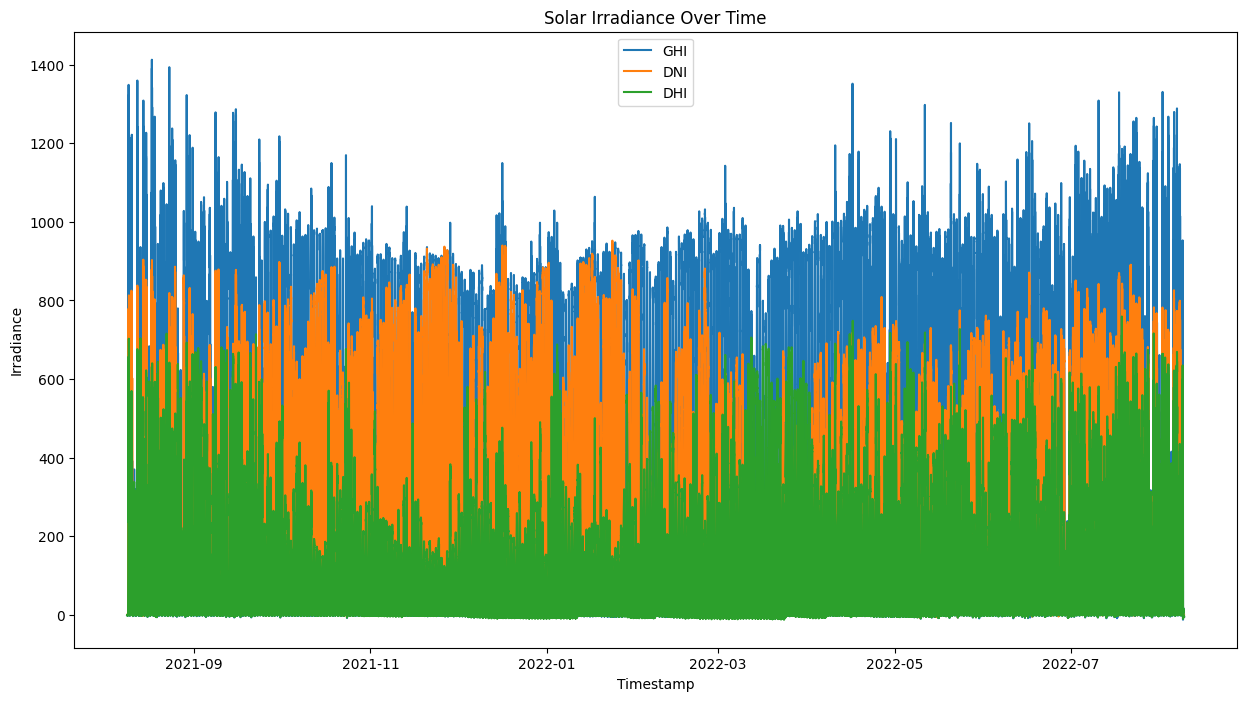

In [12]:
import matplotlib.pyplot as plt

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance')
plt.title('Solar Irradiance Over Time')
plt.legend()
plt.show()

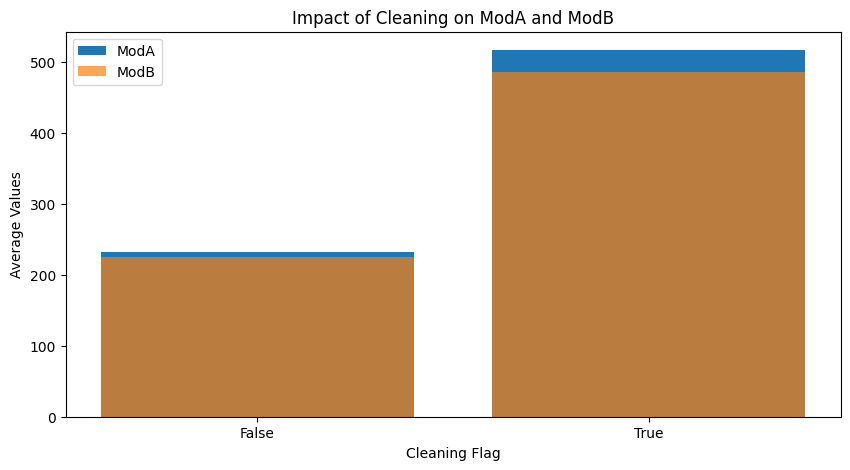

In [13]:
# Group by cleaning flag and calculate average ModA & ModB
cleaning_impact = df.groupby('outlier').agg({'ModA': 'mean', 'ModB': 'mean'}).reset_index()

# Plotting the impact of cleaning
plt.figure(figsize=(10, 5))
plt.bar(cleaning_impact['outlier'].astype(str), cleaning_impact['ModA'], label='ModA')
plt.bar(cleaning_impact['outlier'].astype(str), cleaning_impact['ModB'], label='ModB', alpha=0.7)
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.title('Impact of Cleaning on ModA and ModB')
plt.legend()
plt.show()

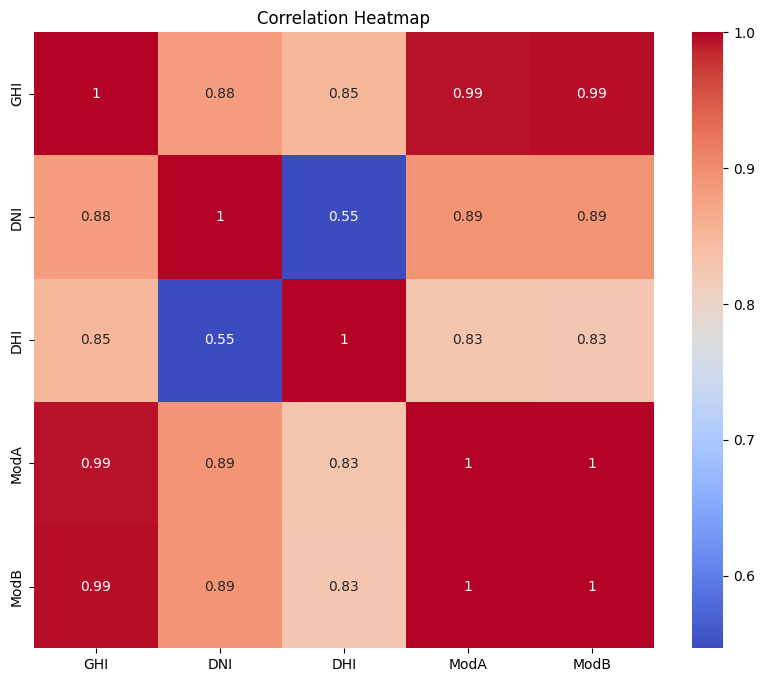

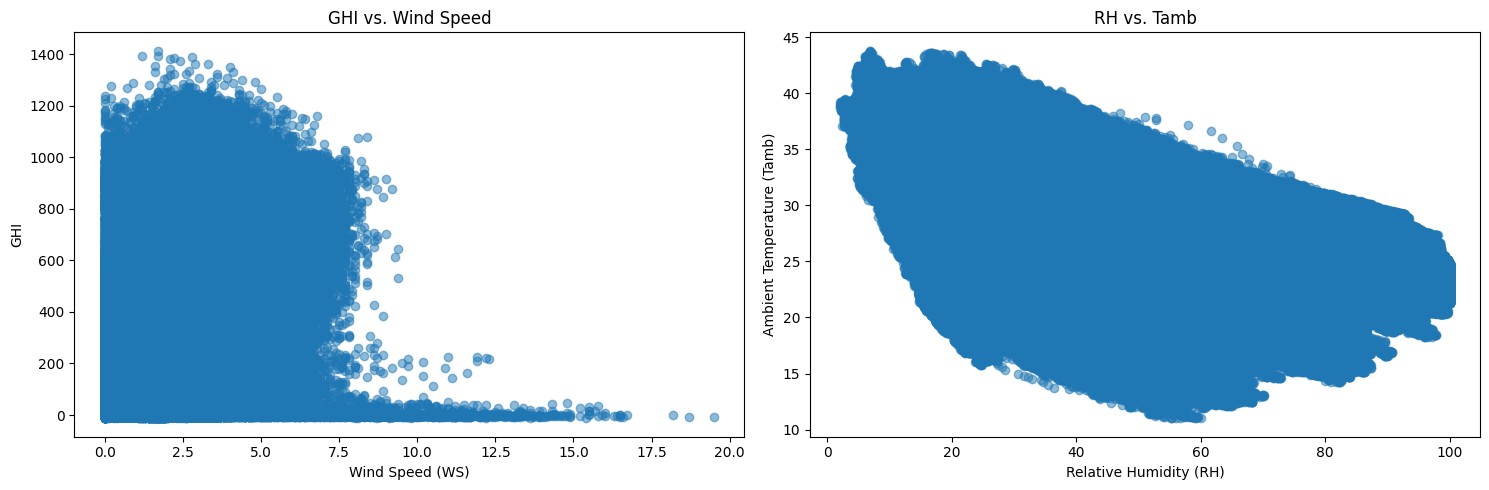

In [14]:
import seaborn as sns

# Heatmap of correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.title('GHI vs. Wind Speed')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('RH vs. Tamb')

plt.tight_layout()
plt.show()

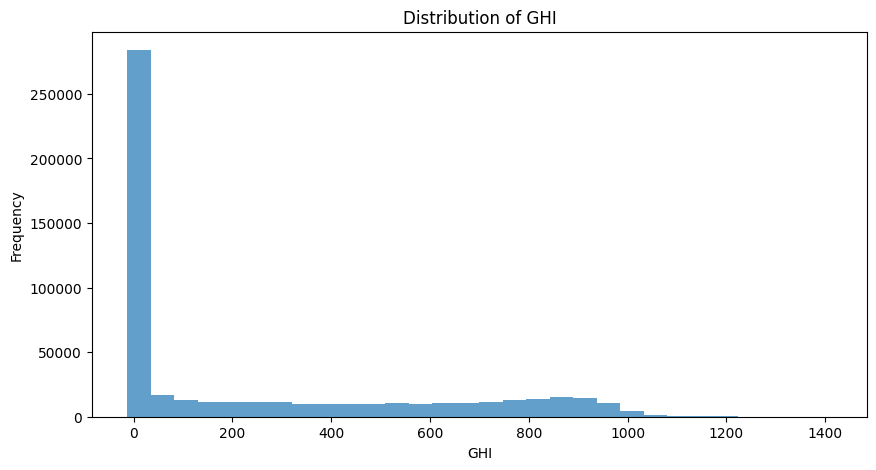

In [15]:
# Histogram for GHI
plt.figure(figsize=(10, 5))
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.show()

# Wind rose plot (requires additional libraries like matplotlib)